In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
# Documentation on convex hull library here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

In [2]:
def make_onions(X):
    layers = []
    while X.shape[0] > 2:
        # Compute and add this layer
        hull = ConvexHull(X)
        layers.append(X[hull.vertices, :])
        # Remove points from this layer
        idx = np.ones(X.shape[0])
        idx[hull.vertices] = 0
        X = X[idx == 1, :]
    if X.shape[0] > 0:
        layers.append(X)
    return layers

def plot_layers(layers):
    for Xi in layers:
        Xi = np.concatenate((Xi, Xi[0, :][None, :]), axis=0)
        plt.plot(Xi[:, 0], Xi[:, 1])

        
def plot_line(X, a, b, c):
    """
    Plot an implicit line equation in the bounding box of a point set
    """
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    iv = max(xmax[1]-xmin[1], xmax[0]-xmin[0])
    
    p0 = -c*np.array([a, b])/(a**2 + b**2)
    v = np.array([-b, a])
    mag = np.sqrt(np.sum(v**2))
    if mag > 0:
        v = v/mag
        p = p0 - iv*v
        q = p0 + iv*v
        plt.plot([p[0], q[0]], [p[1], q[1]], 'k', linewidth=4)
    
        
def above_line(X, a, b, c):
    """
    Compute whether points are above or below a line specified by the implicit equation
    ax + by + c = 0
    """
    return a*X[:, 0] + b*X[:, 1] + c > 0

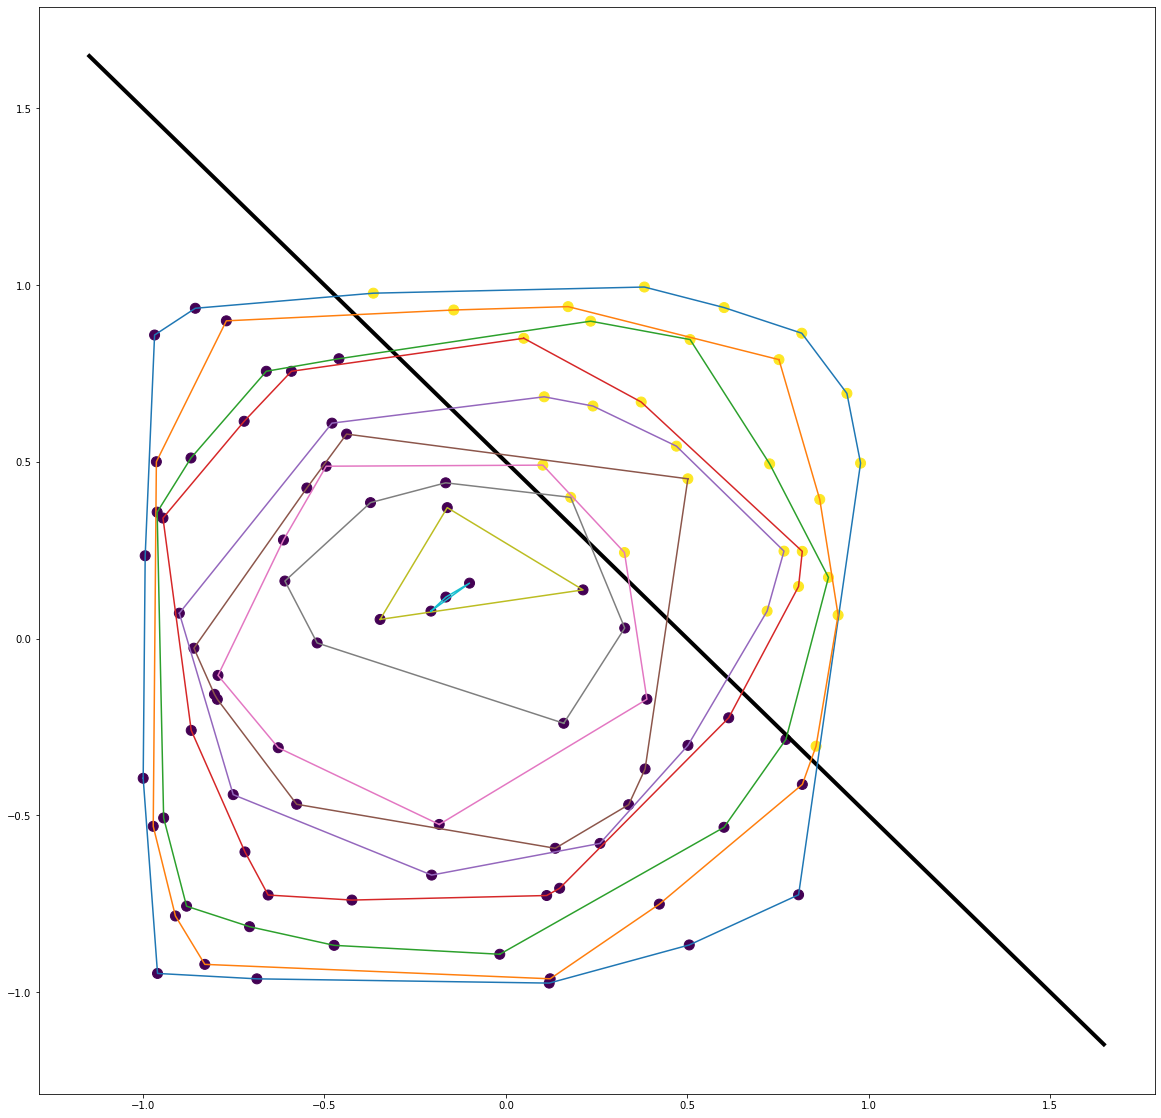

In [3]:
np.random.seed(1)
X = np.random.rand(100, 2)*2-1
layers = make_onions(X)

a = 1; b = 1; c = -0.5;

plt.figure(figsize=(20, 20))
plot_line(X, a, b, c)
plt.scatter(X[:, 0], X[:, 1], 100, c=above_line(X, a, b, c))


plot_layers(layers)